In [1]:
import os 
import pandas as pd

from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
from collections import Counter
import seaborn as sn

import scipy.stats as stats
import numpy as np

In [2]:
box_file_dir = os.path.join(os.getcwd(), "..", "..", "Box")
file_path_csv = os.path.join(box_file_dir, "covid_pts_enc_level_labs_dx_2021-02-02_deid.csv")

In [3]:
df = pd.read_csv(file_path_csv, index_col=False)

In [4]:
df['zip_cust_table'].dtypes

dtype('O')

In [5]:
df.dtypes

admit_dt_tm                object
discharge_dt_tm            object
facility                   object
encounter_type_display     object
age_at_admit                int64
                           ...   
cancer_com_flag            object
qSOFA_score               float64
deid_empi_encounter        object
deid_mrn_encounter          int64
deid_fin_encounter          int64
Length: 70, dtype: object

In [6]:
Counter(df['race_display'])

Counter({'White': 2023,
         'Black or African American': 242,
         'Asian': 27,
         'Unknown': 50,
         'Other Race': 91,
         'American Indian/Alaska Native': 12,
         'Decline to Specify': 18,
         'Hispanic': 1,
         'Native Hawaiian or Other Pacific Islande': 5})

In [7]:
def latinx(row):
    if row.ethnicity_display == 'Hispanic or Latino' and row.race_display == 'White':
        return "Hispanic"
    elif row.ethnicity_display == 'Not Hispanic or Latino' and row.race_display == 'White': 
        return "White"
    else:
        return row.race_display
        

In [8]:
df['race_display'] = df.apply(lambda row: latinx(row), axis=1)

In [9]:
Counter(df['race_display'])

Counter({'Hispanic': 1197,
         'Black or African American': 242,
         'White': 827,
         'Asian': 27,
         'Unknown': 50,
         'Other Race': 91,
         'American Indian/Alaska Native': 12,
         'Decline to Specify': 18,
         'Native Hawaiian or Other Pacific Islande': 5})

In [10]:
df['ethnicity_display']

0           Hispanic or Latino
1           Hispanic or Latino
2       Not Hispanic or Latino
3       Not Hispanic or Latino
4       Not Hispanic or Latino
                 ...          
2464                   Unknown
2465    Not Hispanic or Latino
2466    Not Hispanic or Latino
2467        Hispanic or Latino
2468                   Unknown
Name: ethnicity_display, Length: 2469, dtype: object

In [11]:
zip_df = pd.read_csv('zip_code_data.csv', index_col=False)

In [12]:
zip_df['zip_code'] = zip_df.zip_code.apply(lambda x: x.strip('ZCTA5 '))

In [13]:
zip_df.head()

,zip_code,male_poverty_rate,female_poverty_rate,median_income,mean_income,poverty_rate
0,75001,3.8,11.4,72512,87472,10.9
1,75002,1.4,5.2,101429,125779,4.9
2,75006,2.1,12.3,64462,85788,10.8
3,75007,1.8,6.6,86648,102783,6.7
4,75009,1.2,6.1,111146,144513,4


In [14]:
df.columns

Index(['admit_dt_tm', 'discharge_dt_tm', 'facility', 'encounter_type_display',
       'age_at_admit', 'gender', 'zip_cust_table', 'ethnicity_display',
       'race_display', 'race_eth_comb', 'length_of_stay', 'icd_prim',
       'deceased_dt_tm', 'discharge_disposition_display', 'dc_dispo_cat',
       'insured_uninsured', 'admit_source', 'arrival_mode',
       'vent_hours_summed', 'vent_first_order_start_time',
       'vent_last_order_end_time', 'icu_hours_summed', 'icu_first_begin_time',
       'icu_last_end_time', 'occupation', 'occ_cat', 'emp_yn', 'Creatinine',
       'Abs_Lymph', 'ALT', 'AST', 'Bili_Total', 'D-Dimer',
       'Diastolic_Blood_Pressure', 'Dosing_Weight_(kg)', 'FiO2/Percent',
       'Glasgow_Coma_Score', 'Lymph_Auto', 'Oxygen_Delivery_Method',
       'Oxygen_Saturation', 'Platelet', 'pO2_Art', 'Procalcitonin',
       'Respiratory_Rate', 'Systolic_Blood_Pressure', 'Troponin-I', 'WBC',
       'Oxygen_Flow_Rate', 'Patient_Smoking_Status', 'Visit_Reason',
       'Height_(i

In [15]:
icu_df = df[~df['icu_hours_summed'].isnull()]

In [16]:
demo_df = icu_df[['zip_cust_table', 'ethnicity_display', 'age_at_admit', 'discharge_disposition_display', 'race_display', 'race_eth_comb', 'heart_pulse_comb', 'temp_oral_degC', 'calc_pulled_BMI', 'no_dx_data',
       'COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag', 'qSOFA_score' ]]

In [17]:
pd.merge?

In [18]:
all_df = pd.merge(demo_df, zip_df, left_on='zip_cust_table', right_on='zip_code', how='inner')

In [19]:
len(all_df['zip_cust_table'].unique())

99

In [20]:
all_df.columns

Index(['zip_cust_table', 'ethnicity_display', 'age_at_admit',
       'discharge_disposition_display', 'race_display', 'race_eth_comb',
       'heart_pulse_comb', 'temp_oral_degC', 'calc_pulled_BMI', 'no_dx_data',
       'COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag', 'qSOFA_score', 'zip_code',
       'male_poverty_rate', 'female_poverty_rate', 'median_income',
       'mean_income', 'poverty_rate'],
      dtype='object')

In [21]:
all_df[['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag']] = all_df[['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag']].fillna(0)

In [22]:
all_df[['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag']] = all_df[['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag']].astype(int)

In [23]:
def comorbidity_count(row):
    count = 0 
    
    if row.COPD_com_flag == 1:
        count += 1 
        
    if row.asthma_com_flag == 1:
        count += 1 
        
    if row.diabetes_com_flag == 1:
        count += 1 
        
    if row.hypertension_com_flag == 1:
        count += 1 
        
    if row.CAD_com_flag == 1:
        count += 1 
        
    if row.heartfailure_com_flag == 1: 
        count += 1 
        
    if row.CKD_com_flag == 1:
        count += 1 
        
    if row.cancer_com_flag == 1:
        count += 1 
        
    return count

In [24]:
all_df['total_comorbidities'] = all_df.apply(lambda row: comorbidity_count(row), axis=1)

In [25]:
all_df

,zip_cust_table,ethnicity_display,age_at_admit,discharge_disposition_display,race_display,race_eth_comb,heart_pulse_comb,temp_oral_degC,calc_pulled_BMI,no_dx_data,...,CKD_com_flag,cancer_com_flag,qSOFA_score,zip_code,male_poverty_rate,female_poverty_rate,median_income,mean_income,poverty_rate,total_comorbidities
0,78130,Hispanic or Latino,44,Expired,Hispanic,White Hispanic,97.0,NaN,30.620000,False,...,0,0,3.0,78130,1.5,10,65627,84515,9.5,0
1,78130,Hispanic or Latino,71,Rehab Care,Hispanic,White Hispanic,101.0,37.2,27.760000,False,...,1,0,2.0,78130,1.5,10,65627,84515,9.5,2
2,78130,Hispanic or Latino,71,Skilled Nursing Care,Hispanic,White Hispanic,98.0,36.9,NaN,False,...,0,0,1.0,78130,1.5,10,65627,84515,9.5,3
3,78130,Unknown,47,Still a patient,White,White Unknown Ethnicity,98.0,36.7,NaN,False,...,0,0,0.0,78130,1.5,10,65627,84515,9.5,0
4,78612,Not Hispanic or Latino,49,Home,White,White Non Hispanic,99.0,37.4,44.890000,False,...,0,0,1.0,78612,6.3,10.9,69213,80458,10.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,78207,Not Hispanic or Latino,5,Expired,Black or African American,Other race Non Hispanic,122.0,NaN,18.312818,False,...,0,0,NaN,78207,3.1,44.2,27205,37257,38.7,0
672,79762,Hispanic or Latino,42,Home,Other Race,Other Race Hispanic,91.0,36.9,49.153355,False,...,0,0,0.0,79762,2,9.5,66584,88737,9.1,0
673,78132,Not Hispanic or Latino,22,Home,White,White Non Hispanic,87.0,37.4,19.280000,False,...,0,0,1.0,78132,2,4.2,106523,135706,3.9,0
674,76527,Unknown,51,Home,White,White Unknown Ethnicity,88.0,37.7,33.163386,False,...,0,0,1.0,76527,6.2,14,54940,80699,13.6,3


In [26]:
all_df['has_comorbidity'] = all_df.total_comorbidities.apply(lambda x: 1 if x >= 1 else 0)
all_df['death'] = all_df.discharge_disposition_display.apply(lambda x: 1 if x == 'Expired' else 0)

In [27]:
Counter(all_df['race_display'])

Counter({'Hispanic': 342,
         'White': 226,
         'Other Race': 26,
         'Decline to Specify': 4,
         'Black or African American': 53,
         'American Indian/Alaska Native': 4,
         'Asian': 5,
         'Unknown': 15,
         'Native Hawaiian or Other Pacific Islande': 1})

In [28]:
temp_df = all_df[~all_df['qSOFA_score'].isnull()]

In [29]:
Counter(all_df['qSOFA_score'])

Counter({3.0: 14,
         2.0: 99,
         1.0: 363,
         0.0: 176,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1})

## Age

In [30]:
"""
Age ranges from Census 2000 Standard Population Data 
Under 1 Year
1 to 4 years
5 to 14 years
15 to 24 years
25 to 34 years
35 to 44 years
45 to 54 years
55 to 64 years
65 to 74 years
75 to 84 years
85 years and over

"""

import numpy as np

bins = [0, 4, 14,24,34,44,54,64,74,85]
bin_conv = [i+1 for i in range(len(bins))]
all_df['age_binned'] = np.searchsorted(bins, all_df['age_at_admit'].values)
temp_df['age_binned'] = np.searchsorted(bins, temp_df['age_at_admit'].values)
population = 28995881

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [31]:
age_percentages = {
    0: 0.013818, 
    1: 0.055317, 
    2: 0.145565,
    3: 0.138646,
    4: 0.135573, 
    5: 0.162613,
    6: 0.134834,
    7: 0.087247,
    8: 0.066037,
    9: 0.044842, 
    10: 0.015508
}

In [33]:
age_percentages_description = {
    0: "Under 1 Year", 
    1: "1 - 4 Years", 
    2: "5 - 14 Years",
    3: "15 - 24 Years",
    4: "25 - 34 Years", 
    5: "35 - 44 Years",
    6: "45 - 54 Years",
    7: "55 - 64 Years",
    8: "65 - 74 Years",
    9: "75 - 84 Years", 
    10: "85 Years and Over"
}

In [34]:
# get age counts for mortality 

mortality_df = all_df[all_df['discharge_disposition_display'] == 'Expired']

mortality_counts_per_age_group = Counter(mortality_df['age_binned'])
total_count_per_age_group = Counter(all_df['age_binned'])

In [35]:
mortality_df[mortality_df["age_binned"] == 2]

,zip_cust_table,ethnicity_display,age_at_admit,discharge_disposition_display,race_display,race_eth_comb,heart_pulse_comb,temp_oral_degC,calc_pulled_BMI,no_dx_data,...,zip_code,male_poverty_rate,female_poverty_rate,median_income,mean_income,poverty_rate,total_comorbidities,has_comorbidity,death,age_binned
671,78207,Not Hispanic or Latino,5,Expired,Black or African American,Other race Non Hispanic,122.0,NaN,18.312818,False,...,78207,3.1,44.2,27205,37257,38.7,0,0,1,2


In [36]:
all_df[all_df["age_binned"] == 1]

,zip_cust_table,ethnicity_display,age_at_admit,discharge_disposition_display,race_display,race_eth_comb,heart_pulse_comb,temp_oral_degC,calc_pulled_BMI,no_dx_data,...,zip_code,male_poverty_rate,female_poverty_rate,median_income,mean_income,poverty_rate,total_comorbidities,has_comorbidity,death,age_binned


In [37]:
series = pd.Series(age_percentages_description, name='age_group')

In [38]:
series_one = pd.Series(age_percentages, name='population')

In [39]:
series_two = pd.Series(mortality_counts_per_age_group, name='mortality_count')
series_two

5      4
8     45
7     37
9     34
4      2
6     16
10    12
2      1
Name: mortality_count, dtype: int64

In [40]:
series_three = pd.Series(total_count_per_age_group, name='counts_per_group')
series_three

5      68
8     139
6     113
7     159
4      53
3      26
9      78
0       1
10     31
2       8
Name: counts_per_group, dtype: int64

In [41]:
Counter(all_df["death"])

Counter({1: 151, 0: 525})

In [52]:
series_one

0     0.013818
1     0.055317
2     0.145565
3     0.138646
4     0.135573
5     0.162613
6     0.134834
7     0.087247
8     0.066037
9     0.044842
10    0.015508
Name: population, dtype: float64

In [42]:
age_df = pd.concat([series, series_one, series_two, series_three], axis=1)

In [43]:
age_df = age_df.fillna(0)
age_df

,age_group,population,mortality_count,counts_per_group
0,Under 1 Year,0.013818,0.0,1.0
1,1 - 4 Years,0.055317,0.0,0.0
2,5 - 14 Years,0.145565,1.0,8.0
3,15 - 24 Years,0.138646,0.0,26.0
4,25 - 34 Years,0.135573,2.0,53.0
5,35 - 44 Years,0.162613,4.0,68.0
6,45 - 54 Years,0.134834,16.0,113.0
7,55 - 64 Years,0.087247,37.0,159.0
8,65 - 74 Years,0.066037,45.0,139.0
9,75 - 84 Years,0.044842,34.0,78.0


In [46]:
def crude_rate(row):
    if row.counts_per_group == 0:
        return 0 
    else:
        return ((row.mortality_count / row.counts_per_group) * 100000)

def age_adjusted_rate(row):
    return row.population * row.crude_rate

In [47]:
age_df['crude_rate'] = age_df.apply(lambda row: crude_rate(row), axis=1)

In [48]:
age_df

,age_group,population,mortality_count,counts_per_group,crude_rate
0,Under 1 Year,0.013818,0.0,1.0,0.000000
1,1 - 4 Years,0.055317,0.0,0.0,0.000000
2,5 - 14 Years,0.145565,1.0,8.0,12500.000000
3,15 - 24 Years,0.138646,0.0,26.0,0.000000
4,25 - 34 Years,0.135573,2.0,53.0,3773.584906
5,35 - 44 Years,0.162613,4.0,68.0,5882.352941
6,45 - 54 Years,0.134834,16.0,113.0,14159.292035
7,55 - 64 Years,0.087247,37.0,159.0,23270.440252
8,65 - 74 Years,0.066037,45.0,139.0,32374.100719
9,75 - 84 Years,0.044842,34.0,78.0,43589.743590


In [49]:
age_df['age_adjusted_rate'] = age_df.apply(lambda row: age_adjusted_rate(row), axis=1)

In [50]:
# age adjusted rate for all people in texas using 2019 census data
age_df

,age_group,population,mortality_count,counts_per_group,crude_rate,age_adjusted_rate
0,Under 1 Year,0.013818,0.0,1.0,0.000000,0.000000
1,1 - 4 Years,0.055317,0.0,0.0,0.000000,0.000000
2,5 - 14 Years,0.145565,1.0,8.0,12500.000000,1819.562500
3,15 - 24 Years,0.138646,0.0,26.0,0.000000,0.000000
4,25 - 34 Years,0.135573,2.0,53.0,3773.584906,511.596226
5,35 - 44 Years,0.162613,4.0,68.0,5882.352941,956.547059
6,45 - 54 Years,0.134834,16.0,113.0,14159.292035,1909.153982
7,55 - 64 Years,0.087247,37.0,159.0,23270.440252,2030.276101
8,65 - 74 Years,0.066037,45.0,139.0,32374.100719,2137.888489
9,75 - 84 Years,0.044842,34.0,78.0,43589.743590,1954.651282


### Hispanic 

In [53]:
hispanic_df =  all_df[all_df['race_display'] == 'Hispanic']
hispanic_mortality_df = hispanic_df[hispanic_df['discharge_disposition_display'] == 'Expired']

mortality_counts_per_age_group = Counter(hispanic_mortality_df['age_binned'])
total_count_per_age_group = Counter(hispanic_df['age_binned'])
series = pd.Series(age_percentages_description, name='age_group')

series_two = pd.Series(mortality_counts_per_age_group, name='mortality_count')
series_two

series_three = pd.Series(total_count_per_age_group, name='counts_per_group')
series_three

hispanic_age_df =  pd.concat([series, series_one, series_two, series_three], axis=1)
hispanic_age_df = hispanic_age_df.fillna(0)

hispanic_age_df['crude_rate'] = hispanic_age_df.apply(lambda row: crude_rate(row), axis=1)
hispanic_age_df['age_adjusted_rate'] = hispanic_age_df.apply(lambda row: age_adjusted_rate(row), axis=1)

hispanic_age_df 

,age_group,population,mortality_count,counts_per_group,crude_rate,age_adjusted_rate
0,Under 1 Year,0.013818,0.0,1.0,0.000000,0.000000
1,1 - 4 Years,0.055317,0.0,0.0,0.000000,0.000000
2,5 - 14 Years,0.145565,0.0,6.0,0.000000,0.000000
3,15 - 24 Years,0.138646,0.0,8.0,0.000000,0.000000
4,25 - 34 Years,0.135573,2.0,30.0,6666.666667,903.820000
5,35 - 44 Years,0.162613,3.0,40.0,7500.000000,1219.597500
6,45 - 54 Years,0.134834,12.0,60.0,20000.000000,2696.680000
7,55 - 64 Years,0.087247,21.0,91.0,23076.923077,2013.392308
8,65 - 74 Years,0.066037,17.0,59.0,28813.559322,1902.761017
9,75 - 84 Years,0.044842,19.0,34.0,55882.352941,2505.876471


### Asian 

In [54]:
asian_df =  all_df[all_df['race_display'] == 'Asian']
asian_mortality_df = asian_df[asian_df['discharge_disposition_display'] == 'Expired']

mortality_counts_per_age_group = Counter(asian_mortality_df['age_binned'])
total_count_per_age_group = Counter(asian_df['age_binned'])
series = pd.Series(age_percentages_description, name='age_group')

# fill series one
series_two = pd.Series(mortality_counts_per_age_group, name='mortality_count')
series_two

series_three = pd.Series(total_count_per_age_group, name='counts_per_group')
series_three

asian_age_df =  pd.concat([series, series_one, series_two, series_three], axis=1)
asian_age_df = asian_age_df.fillna(0)

asian_age_df['crude_rate'] = asian_age_df.apply(lambda row: crude_rate(row), axis=1)
asian_age_df['age_adjusted_rate'] = asian_age_df.apply(lambda row: age_adjusted_rate(row), axis=1)

asian_age_df 

,age_group,population,mortality_count,counts_per_group,crude_rate,age_adjusted_rate
0,Under 1 Year,0.013818,0.0,0.0,0.0,0.0
1,1 - 4 Years,0.055317,0.0,0.0,0.0,0.0
2,5 - 14 Years,0.145565,0.0,0.0,0.0,0.0
3,15 - 24 Years,0.138646,0.0,0.0,0.0,0.0
4,25 - 34 Years,0.135573,0.0,1.0,0.0,0.0
5,35 - 44 Years,0.162613,0.0,0.0,0.0,0.0
6,45 - 54 Years,0.134834,0.0,1.0,0.0,0.0
7,55 - 64 Years,0.087247,1.0,1.0,100000.0,8724.7
8,65 - 74 Years,0.066037,2.0,2.0,100000.0,6603.7
9,75 - 84 Years,0.044842,0.0,0.0,0.0,0.0


In [58]:
all_df['race_display'].unique()

array(['Hispanic', 'White', 'Other Race', 'Decline to Specify',
       'Black or African American', 'American Indian/Alaska Native',
       'Asian', 'Unknown', 'Native Hawaiian or Other Pacific Islande'],
      dtype=object)

### African-American 

In [59]:
aa_df =  all_df[all_df['race_display'] == 'Black or African American']
aa_mortality_df = aa_df[aa_df['discharge_disposition_display'] == 'Expired']

mortality_counts_per_age_group = Counter(aa_mortality_df['age_binned'])
total_count_per_age_group = Counter(aa_df['age_binned'])
series = pd.Series(age_percentages_description, name='age_group')

# fill series one
series_two = pd.Series(mortality_counts_per_age_group, name='mortality_count')
series_two

series_three = pd.Series(total_count_per_age_group, name='counts_per_group')
series_three

aa_age_df =  pd.concat([series, series_one, series_two, series_three], axis=1)
aa_age_df = aa_age_df.fillna(0)

aa_age_df['crude_rate'] = aa_age_df.apply(lambda row: crude_rate(row), axis=1)
aa_age_df['age_adjusted_rate'] = aa_age_df.apply(lambda row: age_adjusted_rate(row), axis=1)

aa_age_df 

,age_group,population,mortality_count,counts_per_group,crude_rate,age_adjusted_rate
0,Under 1 Year,0.013818,0.0,0.0,0.000000,0.000000
1,1 - 4 Years,0.055317,0.0,0.0,0.000000,0.000000
2,5 - 14 Years,0.145565,1.0,1.0,100000.000000,14556.500000
3,15 - 24 Years,0.138646,0.0,0.0,0.000000,0.000000
4,25 - 34 Years,0.135573,0.0,9.0,0.000000,0.000000
5,35 - 44 Years,0.162613,0.0,2.0,0.000000,0.000000
6,45 - 54 Years,0.134834,0.0,5.0,0.000000,0.000000
7,55 - 64 Years,0.087247,4.0,9.0,44444.444444,3877.644444
8,65 - 74 Years,0.066037,6.0,14.0,42857.142857,2830.157143
9,75 - 84 Years,0.044842,3.0,8.0,37500.000000,1681.575000


### White

In [60]:
white_df =  all_df[all_df['race_display'] == 'White']
white_mortality_df = white_df[white_df['discharge_disposition_display'] == 'Expired']

mortality_counts_per_age_group = Counter(white_mortality_df['age_binned'])
total_count_per_age_group = Counter(white_df['age_binned'])
series = pd.Series(age_percentages_description, name='age_group')

# fill series one
series_two = pd.Series(mortality_counts_per_age_group, name='mortality_count')
series_two

series_three = pd.Series(total_count_per_age_group, name='counts_per_group')
series_three

aa_age_df =  pd.concat([series, series_one, series_two, series_three], axis=1)
aa_age_df = aa_age_df.fillna(0)

aa_age_df['crude_rate'] = aa_age_df.apply(lambda row: crude_rate(row), axis=1)
aa_age_df['age_adjusted_rate'] = aa_age_df.apply(lambda row: age_adjusted_rate(row), axis=1)

aa_age_df 

,age_group,population,mortality_count,counts_per_group,crude_rate,age_adjusted_rate
0,Under 1 Year,0.013818,0.0,0.0,0.000000,0.000000
1,1 - 4 Years,0.055317,0.0,0.0,0.000000,0.000000
2,5 - 14 Years,0.145565,0.0,1.0,0.000000,0.000000
3,15 - 24 Years,0.138646,0.0,13.0,0.000000,0.000000
4,25 - 34 Years,0.135573,0.0,11.0,0.000000,0.000000
5,35 - 44 Years,0.162613,0.0,20.0,0.000000,0.000000
6,45 - 54 Years,0.134834,2.0,40.0,5000.000000,674.170000
7,55 - 64 Years,0.087247,6.0,44.0,13636.363636,1189.731818
8,65 - 74 Years,0.066037,13.0,54.0,24074.074074,1589.779630
9,75 - 84 Years,0.044842,11.0,31.0,35483.870968,1591.167742


In [ ]:
hi

In [44]:
series

0    1971720
1    5422230
2    2812600
3    8205834
4    3566493
5    3276535
6    2261679
7    1478790
dtype: int64

In [47]:
age_df = pd.merge(series, series_two)

ValueError: Cannot merge a Series without a name

In [40]:
age_percentages

{0: 1971720,
 1: 5422230,
 2: 2812600,
 3: 8205834,
 4: 3566493,
 5: 3276535,
 6: 2261679,
 7: 1478790}

In [ ]:
def age_population_conversion(population, row):
    # percentages from US Census data
    if row.age_binned == 0:
        return population * (6.8 * 1e-2)
    elif row.age_binned == 1: 
        return population * (18.7 * 1e-2)
    elif row.age_binned == 2: 
        return population * (9.7 * 1e-2)
    elif row.age_binned == 3: 
        return population * (28.3 * 1e-2)
    elif row.age_binned == 4: 
        return population * (12.3 * 1e-2)
    elif row.age_binned == 5: 
        return population * (11.3 * 1e-2)
    elif row.age_binned == 6: 
        return population * (7.8 * 1e-2)
    else:
        return population * (5.1 * 1e-2)

In [44]:
sorted(all_df['age_binned'].unique())

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [45]:
# H-Test to test if binned age group means are statistically different against average prediction of death
stats.kruskal(all_df['death'][all_df['age_binned'] == 0],
               all_df['death'][all_df['age_binned'] == 2],
               all_df['death'][all_df['age_binned'] == 3],
               all_df['death'][all_df['age_binned'] == 4],
               all_df['death'][all_df['age_binned'] == 5],
               all_df['death'][all_df['age_binned'] == 6],
               all_df['death'][all_df['age_binned'] == 7],  
                all_df['death'][all_df['age_binned'] == 8], 
              all_df['death'][all_df['age_binned'] == 9], 
              all_df['death'][all_df['age_binned'] == 10], 
              all_df['death'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=72.28374509493054, pvalue=1.6031807174729563e-11)

In [46]:
sorted(temp_df['age_binned'].unique())

[3, 4, 5, 6, 7, 8, 9, 10, 11]

In [47]:
# H-Test to test if binned age group means are statistically different against average prediction of death
stats.kruskal(
               temp_df['qSOFA_score'][temp_df['age_binned'] == 3],
               temp_df['qSOFA_score'][temp_df['age_binned'] == 4],
               temp_df['qSOFA_score'][temp_df['age_binned'] == 5],
               temp_df['qSOFA_score'][temp_df['age_binned'] == 6],
               temp_df['qSOFA_score'][temp_df['age_binned'] == 7],  
                temp_df['qSOFA_score'][temp_df['age_binned'] == 8], 
              temp_df['qSOFA_score'][temp_df['age_binned'] == 9], 
              temp_df['qSOFA_score'][temp_df['age_binned'] == 10], 
              temp_df['qSOFA_score'][temp_df['age_binned'] == 11], 
               )

KruskalResult(statistic=16.042528988163937, pvalue=0.04177542082395755)

In [48]:
# H-Test to test if binned age group means are statistically different against average prediction of death
stats.kruskal(all_df['total_comorbidities'][all_df['age_binned'] == 0],
               all_df['total_comorbidities'][all_df['age_binned'] == 2],
               all_df['total_comorbidities'][all_df['age_binned'] == 3],
               all_df['total_comorbidities'][all_df['age_binned'] == 4],
               all_df['total_comorbidities'][all_df['age_binned'] == 5],
               all_df['total_comorbidities'][all_df['age_binned'] == 6],
               all_df['total_comorbidities'][all_df['age_binned'] == 7],  
                all_df['total_comorbidities'][all_df['age_binned'] == 8], 
              all_df['total_comorbidities'][all_df['age_binned'] == 9], 
              all_df['total_comorbidities'][all_df['age_binned'] == 10], 
              all_df['total_comorbidities'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=128.38453645099958, pvalue=9.973570829207671e-23)

In [49]:
# H-Test to test if binned age group means are statistically different against average prediction of death
stats.kruskal(all_df['has_comorbidity'][all_df['age_binned'] == 0],
               all_df['has_comorbidity'][all_df['age_binned'] == 2],
               all_df['has_comorbidity'][all_df['age_binned'] == 3],
               all_df['has_comorbidity'][all_df['age_binned'] == 4],
               all_df['has_comorbidity'][all_df['age_binned'] == 5],
               all_df['has_comorbidity'][all_df['age_binned'] == 6],
               all_df['has_comorbidity'][all_df['age_binned'] == 7],  
                all_df['has_comorbidity'][all_df['age_binned'] == 8], 
              all_df['has_comorbidity'][all_df['age_binned'] == 9], 
              all_df['has_comorbidity'][all_df['age_binned'] == 10], 
              all_df['has_comorbidity'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=102.32585342095894, pvalue=1.8639805177985975e-17)

In [50]:
# H-Test to test if binned age group means are statistically different against average prediction of death
stats.kruskal(all_df['COPD_com_flag'][all_df['age_binned'] == 0],
               all_df['COPD_com_flag'][all_df['age_binned'] == 2],
               all_df['COPD_com_flag'][all_df['age_binned'] == 3],
               all_df['COPD_com_flag'][all_df['age_binned'] == 4],
               all_df['COPD_com_flag'][all_df['age_binned'] == 5],
               all_df['COPD_com_flag'][all_df['age_binned'] == 6],
               all_df['COPD_com_flag'][all_df['age_binned'] == 7],  
                all_df['COPD_com_flag'][all_df['age_binned'] == 8], 
              all_df['COPD_com_flag'][all_df['age_binned'] == 9], 
              all_df['COPD_com_flag'][all_df['age_binned'] == 10], 
              all_df['COPD_com_flag'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=42.603208866629465, pvalue=5.854593555324175e-06)

In [51]:
# H-Test to test if binned age group means are statistically different against average prediction of death
stats.kruskal(all_df['asthma_com_flag'][all_df['age_binned'] == 0],
               all_df['asthma_com_flag'][all_df['age_binned'] == 2],
               all_df['asthma_com_flag'][all_df['age_binned'] == 3],
               all_df['asthma_com_flag'][all_df['age_binned'] == 4],
               all_df['asthma_com_flag'][all_df['age_binned'] == 5],
               all_df['asthma_com_flag'][all_df['age_binned'] == 6],
               all_df['asthma_com_flag'][all_df['age_binned'] == 7],  
                all_df['asthma_com_flag'][all_df['age_binned'] == 8], 
              all_df['asthma_com_flag'][all_df['age_binned'] == 9], 
              all_df['asthma_com_flag'][all_df['age_binned'] == 10], 
              all_df['asthma_com_flag'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=12.927144891263305, pvalue=0.22777380902310246)

In [52]:
# H-Test to test if binned age group means are statistically different against average prediction of death
stats.kruskal(all_df['diabetes_com_flag'][all_df['age_binned'] == 0],
               all_df['diabetes_com_flag'][all_df['age_binned'] == 2],
               all_df['diabetes_com_flag'][all_df['age_binned'] == 3],
               all_df['diabetes_com_flag'][all_df['age_binned'] == 4],
               all_df['diabetes_com_flag'][all_df['age_binned'] == 5],
               all_df['diabetes_com_flag'][all_df['age_binned'] == 6],
               all_df['diabetes_com_flag'][all_df['age_binned'] == 7],  
                all_df['diabetes_com_flag'][all_df['age_binned'] == 8], 
              all_df['diabetes_com_flag'][all_df['age_binned'] == 9], 
              all_df['diabetes_com_flag'][all_df['age_binned'] == 10], 
              all_df['diabetes_com_flag'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=57.81087629089091, pvalue=9.38328550969883e-09)

In [53]:
# H-Test to test if binned age group means are statistically different against average prediction of death
stats.kruskal(all_df['hypertension_com_flag'][all_df['age_binned'] == 0],
               all_df['hypertension_com_flag'][all_df['age_binned'] == 2],
               all_df['hypertension_com_flag'][all_df['age_binned'] == 3],
               all_df['hypertension_com_flag'][all_df['age_binned'] == 4],
               all_df['hypertension_com_flag'][all_df['age_binned'] == 5],
               all_df['hypertension_com_flag'][all_df['age_binned'] == 6],
               all_df['hypertension_com_flag'][all_df['age_binned'] == 7],  
                all_df['hypertension_com_flag'][all_df['age_binned'] == 8], 
              all_df['hypertension_com_flag'][all_df['age_binned'] == 9], 
              all_df['hypertension_com_flag'][all_df['age_binned'] == 10], 
              all_df['hypertension_com_flag'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=50.80185654089459, pvalue=1.8997663494907538e-07)

In [54]:
# H-Test to test if binned age group means are statistically different against average prediction of death
stats.kruskal(all_df['CAD_com_flag'][all_df['age_binned'] == 0],
               all_df['CAD_com_flag'][all_df['age_binned'] == 2],
               all_df['CAD_com_flag'][all_df['age_binned'] == 3],
               all_df['CAD_com_flag'][all_df['age_binned'] == 4],
               all_df['CAD_com_flag'][all_df['age_binned'] == 5],
               all_df['CAD_com_flag'][all_df['age_binned'] == 6],
               all_df['CAD_com_flag'][all_df['age_binned'] == 7],  
                all_df['CAD_com_flag'][all_df['age_binned'] == 8], 
              all_df['CAD_com_flag'][all_df['age_binned'] == 9], 
              all_df['CAD_com_flag'][all_df['age_binned'] == 10], 
              all_df['CAD_com_flag'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=44.68274622348136, pvalue=2.4808421275574227e-06)

In [55]:
stats.kruskal(all_df['heartfailure_com_flag'][all_df['age_binned'] == 0],
               all_df['heartfailure_com_flag'][all_df['age_binned'] == 2],
               all_df['heartfailure_com_flag'][all_df['age_binned'] == 3],
               all_df['heartfailure_com_flag'][all_df['age_binned'] == 4],
               all_df['heartfailure_com_flag'][all_df['age_binned'] == 5],
               all_df['heartfailure_com_flag'][all_df['age_binned'] == 6],
               all_df['heartfailure_com_flag'][all_df['age_binned'] == 7],  
                all_df['heartfailure_com_flag'][all_df['age_binned'] == 8], 
              all_df['heartfailure_com_flag'][all_df['age_binned'] == 9], 
              all_df['heartfailure_com_flag'][all_df['age_binned'] == 10], 
              all_df['heartfailure_com_flag'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=33.29987410359622, pvalue=0.00024251004381790642)

In [56]:
stats.kruskal(all_df['CKD_com_flag'][all_df['age_binned'] == 0],
               all_df['CKD_com_flag'][all_df['age_binned'] == 2],
               all_df['CKD_com_flag'][all_df['age_binned'] == 3],
               all_df['CKD_com_flag'][all_df['age_binned'] == 4],
               all_df['CKD_com_flag'][all_df['age_binned'] == 5],
               all_df['CKD_com_flag'][all_df['age_binned'] == 6],
               all_df['CKD_com_flag'][all_df['age_binned'] == 7],  
                all_df['CKD_com_flag'][all_df['age_binned'] == 8], 
              all_df['CKD_com_flag'][all_df['age_binned'] == 9], 
              all_df['CKD_com_flag'][all_df['age_binned'] == 10], 
              all_df['CKD_com_flag'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=33.23352766780328, pvalue=0.00024883029293754316)

In [57]:
stats.kruskal(all_df['cancer_com_flag'][all_df['age_binned'] == 0],
               all_df['cancer_com_flag'][all_df['age_binned'] == 2],
               all_df['cancer_com_flag'][all_df['age_binned'] == 3],
               all_df['cancer_com_flag'][all_df['age_binned'] == 4],
               all_df['cancer_com_flag'][all_df['age_binned'] == 5],
               all_df['cancer_com_flag'][all_df['age_binned'] == 6],
               all_df['cancer_com_flag'][all_df['age_binned'] == 7],  
                all_df['cancer_com_flag'][all_df['age_binned'] == 8], 
              all_df['cancer_com_flag'][all_df['age_binned'] == 9], 
              all_df['cancer_com_flag'][all_df['age_binned'] == 10], 
              all_df['cancer_com_flag'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=8.365078726579448, pvalue=0.5932231545339637)

## Zip Code

In [58]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

/home/joel/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [59]:
stats.kruskal(all_df['cancer_com_flag'][all_df['age_binned'] == 0],
               all_df['cancer_com_flag'][all_df['age_binned'] == 2],
               all_df['cancer_com_flag'][all_df['age_binned'] == 3],
               all_df['cancer_com_flag'][all_df['age_binned'] == 4],
               all_df['cancer_com_flag'][all_df['age_binned'] == 5],
               all_df['cancer_com_flag'][all_df['age_binned'] == 6],
               all_df['cancer_com_flag'][all_df['age_binned'] == 7],  
                all_df['cancer_com_flag'][all_df['age_binned'] == 8], 
              all_df['cancer_com_flag'][all_df['age_binned'] == 9], 
              all_df['cancer_com_flag'][all_df['age_binned'] == 10], 
              all_df['cancer_com_flag'][all_df['age_binned'] == 11], 
               )

KruskalResult(statistic=8.365078726579448, pvalue=0.5932231545339637)

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='median_income'>

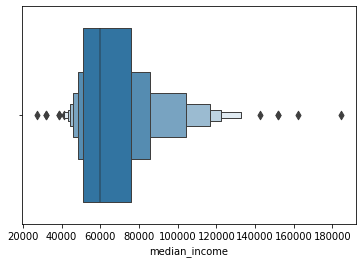

In [60]:
sn.boxenplot(all_df['median_income'].astype(float))

<AxesSubplot:>

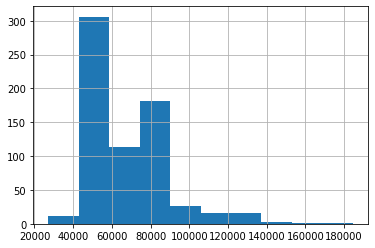

In [61]:
all_df['median_income'].astype(float).hist()

In [62]:
all_df['median_income'] = all_df['median_income'].astype(float) 

In [63]:
temp_df['median_income'] = temp_df['median_income'].astype(float) 

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
all_df['median_income'].describe()

count       676.000000
mean      66941.738166
std       20219.824816
min       27205.000000
25%       51053.000000
50%       59911.000000
75%       75766.000000
max      184500.000000
Name: median_income, dtype: float64

In [65]:
import numpy as np

bins = [20000, 40000, 60000, 80000,100000]
bin_conv = [i+1 for i in range(len(bins))]
all_df['zip_binned_by_income'] = np.searchsorted(bins, all_df['median_income'].values)
temp_df['zip_binned_by_income'] = np.searchsorted(bins, temp_df['median_income'].values)

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
all_df['zip_binned_by_income'].unique()

array([3, 2, 4, 5, 1])

In [71]:
temp_df['zip_binned_by_income'].unique()

array([3, 2, 4, 5, 1])

<AxesSubplot:>

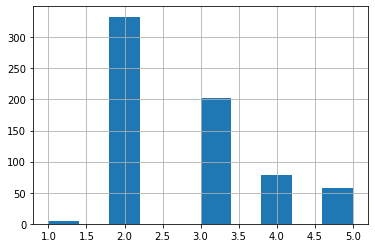

In [69]:
# histogram for counts for zipped bin by median income 
all_df['zip_binned_by_income'].hist()

In [68]:
all_df.head(20)

,zip_cust_table,ethnicity_display,age_at_admit,discharge_disposition_display,race_display,race_eth_comb,heart_pulse_comb,temp_oral_degC,calc_pulled_BMI,no_dx_data,...,male_poverty_rate,female_poverty_rate,median_income,mean_income,poverty_rate,total_comorbidities,has_comorbidity,death,age_binned,zip_binned_by_income
0,78130,Hispanic or Latino,44,Expired,Hispanic,White Hispanic,97.0,NaN,30.62,False,...,1.5,10,65627.0,84515,9.5,0,0,1,6,3
1,78130,Hispanic or Latino,71,Rehab Care,Hispanic,White Hispanic,101.0,37.2,27.76,False,...,1.5,10,65627.0,84515,9.5,2,1,0,9,3
2,78130,Hispanic or Latino,71,Skilled Nursing Care,Hispanic,White Hispanic,98.0,36.9,NaN,False,...,1.5,10,65627.0,84515,9.5,3,1,0,9,3
3,78130,Unknown,47,Still a patient,White,White Unknown Ethnicity,98.0,36.7,NaN,False,...,1.5,10,65627.0,84515,9.5,0,0,0,7,3
4,78612,Not Hispanic or Latino,49,Home,White,White Non Hispanic,99.0,37.4,44.89,False,...,6.3,10.9,69213.0,80458,10.6,0,0,0,7,3
5,78612,Hispanic or Latino,59,Long Term Care Hospital,Other Race,Other Race Hispanic,107.0,36.6,37.05,False,...,6.3,10.9,69213.0,80458,10.6,2,1,0,8,3
6,78612,Hispanic or Latino,26,Home,Hispanic,White Hispanic,61.0,36.9,30.90,False,...,6.3,10.9,69213.0,80458,10.6,0,0,0,5,3
7,78612,Hispanic or Latino,70,Expired,Hispanic,White Hispanic,97.0,37.2,NaN,False,...,6.3,10.9,69213.0,80458,10.6,2,1,1,9,3
8,78612,Hispanic or Latino,63,Expired,Hispanic,White Hispanic,67.0,37.0,24.76,False,...,6.3,10.9,69213.0,80458,10.6,1,1,1,8,3
9,78753,Not Hispanic or Latino,24,Long Term Care Hospital,White,White Non Hispanic,143.0,37.1,34.54,False,...,2,19.3,51053.0,68301,17.6,0,0,0,4,2


In [72]:
# H-Test to test if binned age group means are statistically different against average prediction of death
stats.kruskal(
               all_df['death'][all_df['zip_binned_by_income'] == 1],
               all_df['death'][all_df['zip_binned_by_income'] == 2],
               all_df['death'][all_df['zip_binned_by_income'] == 3],
               all_df['death'][all_df['zip_binned_by_income'] == 4],
               all_df['death'][all_df['zip_binned_by_income'] == 5]
               )

KruskalResult(statistic=6.48111868033658, pvalue=0.1659839536969566)

In [73]:
# H-Test to test if binned age group means are statistically different against average prediction of death
stats.kruskal(
               temp_df['qSOFA_score'][temp_df['zip_binned_by_income'] == 1],
               temp_df['qSOFA_score'][temp_df['zip_binned_by_income'] == 2],
               temp_df['qSOFA_score'][temp_df['zip_binned_by_income'] == 3],
               temp_df['qSOFA_score'][temp_df['zip_binned_by_income'] == 4],
               temp_df['qSOFA_score'][temp_df['zip_binned_by_income'] == 5]
               )

KruskalResult(statistic=6.156530854114128, pvalue=0.18775944760589286)

In [74]:
stats.kruskal(
               all_df['total_comorbidities'][all_df['zip_binned_by_income'] == 1],
               all_df['total_comorbidities'][all_df['zip_binned_by_income'] == 2],
               all_df['total_comorbidities'][all_df['zip_binned_by_income'] == 3],
               all_df['total_comorbidities'][all_df['zip_binned_by_income'] == 4],
               all_df['total_comorbidities'][all_df['zip_binned_by_income'] == 5]
               )

KruskalResult(statistic=7.329074090514673, pvalue=0.1194869096948559)

In [76]:
pairwise_tukeyhsd?

In [79]:
print(pairwise_tukeyhsd(all_df['death'], all_df['zip_binned_by_income']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.3928 0.2232 -0.9055 0.1199  False
     1      3  -0.3635 0.3023 -0.8787 0.1516  False
     1      4  -0.3308 0.4219 -0.8557 0.1942  False
     1      5  -0.4246 0.1854 -0.9553 0.1062  False
     2      3   0.0292    0.9 -0.0721 0.1306  False
     2      4    0.062 0.7328 -0.0811 0.2052  False
     2      5  -0.0318    0.9 -0.1949 0.1313  False
     3      4   0.0328    0.9 -0.1188 0.1844  False
     3      5   -0.061   0.85 -0.2316 0.1096  False
     4      5  -0.0938 0.6713 -0.2921 0.1045  False
---------------------------------------------------


In [80]:
print(pairwise_tukeyhsd(temp_df['qSOFA_score'], temp_df['zip_binned_by_income']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   -0.357 0.8348 -1.3288 0.6147  False
     1      3  -0.3605 0.8318 -1.3365 0.6154  False
     1      4  -0.3019    0.9 -1.2925 0.6887  False
     1      5  -0.0648    0.9 -1.0658 0.9361  False
     2      3  -0.0035    0.9 -0.1797 0.1727  False
     2      4   0.0551    0.9 -0.1896 0.2998  False
     2      5   0.2922 0.0399  0.0085  0.576   True
     3      4   0.0586    0.9 -0.2024 0.3195  False
     3      5   0.2957 0.0528 -0.0022 0.5936  False
     4      5   0.2371 0.3226 -0.1057   0.58  False
---------------------------------------------------


In [81]:
print(pairwise_tukeyhsd(all_df['total_comorbidities'], all_df['zip_binned_by_income']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.1736    0.9 -1.3467 1.6938  False
     1      3   0.3192    0.9 -1.2082 1.8466  False
     1      4   0.4462    0.9 -1.1104 2.0027  False
     1      5  -0.0316    0.9 -1.6053 1.5421  False
     2      3   0.1456 0.6531 -0.1548 0.4461  False
     2      4   0.2726 0.4015 -0.1519  0.697  False
     2      5  -0.2052 0.7469 -0.6888 0.2785  False
     3      4   0.1269    0.9 -0.3225 0.5764  False
     3      5  -0.3508 0.3198 -0.8566  0.155  False
     4      5  -0.4777 0.1728 -1.0657 0.1102  False
---------------------------------------------------


### Poverty Rate 

In [87]:
all_df['poverty_rate'] = all_df['poverty_rate'].astype(float)
temp_df['poverty_rate'] = temp_df['poverty_rate'].astype(float)

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
all_df['poverty_rate'].describe()

count    676.000000
mean      14.031509
std        6.435137
min        2.300000
25%        9.100000
50%       12.700000
75%       18.400000
max       38.700000
Name: poverty_rate, dtype: float64

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='poverty_rate'>

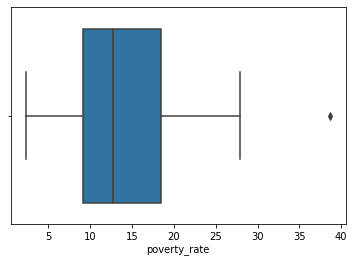

In [85]:
sn.boxplot(all_df['poverty_rate'])

In [88]:
bins = [0, 6, 12, 18,24,30,36,40]
bin_conv = [i+1 for i in range(len(bins))]
all_df['zip_binned_by_poverty'] = np.searchsorted(bins, all_df['poverty_rate'].values)
temp_df['zip_binned_by_poverty'] = np.searchsorted(bins, temp_df['poverty_rate'].values)

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [89]:
all_df['zip_binned_by_poverty'].unique()

array([2, 3, 4, 1, 5, 7])

In [90]:
stats.kruskal(
               all_df['death'][all_df['zip_binned_by_poverty'] == 1],
               all_df['death'][all_df['zip_binned_by_poverty'] == 2],
               all_df['death'][all_df['zip_binned_by_poverty'] == 3],
               all_df['death'][all_df['zip_binned_by_poverty'] == 4],
               all_df['death'][all_df['zip_binned_by_poverty'] == 5],
                all_df['death'][all_df['zip_binned_by_poverty'] == 7],
               )

KruskalResult(statistic=5.294010966158078, pvalue=0.3810620392163848)

In [92]:
temp_df['zip_binned_by_poverty'].unique()

array([2, 3, 4, 1, 5])

In [93]:
stats.kruskal(
               temp_df['qSOFA_score'][temp_df['zip_binned_by_poverty'] == 1],
               temp_df['qSOFA_score'][temp_df['zip_binned_by_poverty'] == 2],
               temp_df['qSOFA_score'][temp_df['zip_binned_by_poverty'] == 3],
               temp_df['qSOFA_score'][temp_df['zip_binned_by_poverty'] == 4],
               temp_df['qSOFA_score'][temp_df['zip_binned_by_poverty'] == 5],
               )

KruskalResult(statistic=12.921979195974854, pvalue=0.011663376751185534)

In [94]:
stats.kruskal(
               all_df['total_comorbidities'][all_df['zip_binned_by_poverty'] == 1],
               all_df['total_comorbidities'][all_df['zip_binned_by_poverty'] == 2],
               all_df['total_comorbidities'][all_df['zip_binned_by_poverty'] == 3],
               all_df['total_comorbidities'][all_df['zip_binned_by_poverty'] == 4],
               all_df['total_comorbidities'][all_df['zip_binned_by_poverty'] == 5],
                all_df['total_comorbidities'][all_df['zip_binned_by_poverty'] == 7],
               )

KruskalResult(statistic=8.819989093672229, pvalue=0.11646321653179063)

In [95]:
print(pairwise_tukeyhsd(all_df['death'], all_df['zip_binned_by_poverty']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.0128    0.9 -0.1384 0.1639  False
     1      3   0.0058    0.9 -0.1463 0.1578  False
     1      4  -0.0351    0.9  -0.193 0.1227  False
     1      5    0.048    0.9 -0.1845 0.2806  False
     1      7   0.7778 0.4324 -0.4198 1.9754  False
     2      3   -0.007    0.9 -0.1272 0.1132  False
     2      4  -0.0479 0.8882 -0.1754 0.0795  False
     2      5   0.0353    0.9 -0.1779 0.2484  False
     2      7    0.765 0.4482  -0.429  1.959  False
     3      4  -0.0409    0.9 -0.1693 0.0876  False
     3      5   0.0423    0.9 -0.1715  0.256  False
     3      7    0.772 0.4377  -0.422 1.9661  False
     4      5   0.0832 0.8786 -0.1347 0.3011  False
     4      7   0.8129 0.3771 -0.3819 2.0077  False
     5      7   0.7297 0.5115 -0.4772 1.9367  False
---------------------------------------------------


In [96]:
# Interesting note about poverty rate 
# poverty rate bands were created by looking at the std of poverty rate counts 
# having qSOFA that is not based on presenting labs and vitals might be interesting 
# to suss out whether or not there are clear differences in means for poverty rate 
print(pairwise_tukeyhsd(temp_df['qSOFA_score'], temp_df['zip_binned_by_poverty']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.3252 0.0036 -0.5748 -0.0756   True
     1      3  -0.3292  0.003 -0.5784 -0.0801   True
     1      4  -0.3303 0.0044  -0.588 -0.0726   True
     1      5   -0.288 0.2262 -0.6651  0.0892  False
     2      3  -0.0041    0.9 -0.2028  0.1947  False
     2      4  -0.0051    0.9 -0.2145  0.2043  False
     2      5   0.0372    0.9 -0.3087  0.3831  False
     3      4   -0.001    0.9 -0.2099  0.2078  False
     3      5   0.0413    0.9 -0.3043  0.3869  False
     4      5   0.0423    0.9 -0.3095  0.3941  False
----------------------------------------------------


In [97]:
print(pairwise_tukeyhsd(all_df['total_comorbidities'], all_df['zip_binned_by_poverty']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.1278    0.9 -0.3196 0.5752  False
     1      3  -0.0782    0.9 -0.5281 0.3717  False
     1      4  -0.0996    0.9 -0.5668 0.3675  False
     1      5   0.3237 0.7326 -0.3646 1.0121  False
     1      7  -1.6222 0.7534 -5.1665  1.922  False
     2      3   -0.206 0.5535 -0.5616 0.1497  False
     2      4  -0.2274 0.5142 -0.6046 0.1498  False
     2      5   0.1959    0.9 -0.4348 0.8267  False
     2      7    -1.75 0.6915 -5.2835 1.7835  False
     3      4  -0.0215    0.9 -0.4016 0.3587  False
     3      5   0.4019 0.4579 -0.2307 1.0345  False
     3      7   -1.544 0.7876 -5.0779 1.9898  False
     4      5   0.4234 0.4198 -0.2216 1.0683  False
     4      7  -1.5226  0.798 -5.0587 2.0135  False
     5      7  -1.9459   0.61  -5.518 1.6261  False
---------------------------------------------------
